In [2]:
import requests
from bs4 import BeautifulSoup


url = 'https://www.data.jma.go.jp/obd/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=2022&month=12&day=&view=a2'

/Users/noguchiharu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:

response = requests.get(url)
html = response.text


soup = BeautifulSoup(html, 'html.parser')

In [4]:

humidity_table = soup.find('table', {'class': 'data2_s'})

In [20]:
scraped_data = []
if humidity_table:
    rows = humidity_table.find_all('tr')
    
   
    for row in rows[16:]:
        columns = row.find_all('td')
        
      
        if len(columns) >= 8:
          
            day = columns[0].text.strip() 
            avg_humidity = columns[16].text.strip()

            scraped_data.append({
                '日': f'{day}',
                '湿度': int(avg_humidity)
            })
            
            print(f'日:{day} 平均湿度: {avg_humidity}')
        else:
            print('列の数が足りません。')
else:
    print('平均湿度のデータが見つかりませんでした。')



1-1014.5-1017.5 平均湿度: 74
2-1018.4-1021.4 平均湿度: 60
3-1020.9-1023.9 平均湿度: 67
4-1014.7-1017.7 平均湿度: 66
5-1016.9-1019.9 平均湿度: 78
6-1012.0-1015.0 平均湿度: 94
7-1012.7-1015.6 平均湿度: 71
8-1014.8-1017.8 平均湿度: 62
9-1017.6-1020.6 平均湿度: 66
10-1013.8-1016.7 平均湿度: 65
11-1009.9-1012.8 平均湿度: 72
12-1017.4-1020.4 平均湿度: 59
13-1009.1-1012.1 平均湿度: 87
14-1005.1-1008.0 平均湿度: 52
15-1011.8-1014.8 平均湿度: 47
16-1014.9-1017.9 平均湿度: 51
17-1012.7-1015.7 平均湿度: 64
18-1003.0-1006.0 平均湿度: 57
19-1011.8-1014.8 平均湿度: 38
20-1018.0-1021.0 平均湿度: 48
21-1014.5-1017.5 平均湿度: 60
22-992.6-995.5 平均湿度: 86
23-991.9-994.9 平均湿度: 29
24-995.6-998.6 平均湿度: 42
25-1002.5-1005.5 平均湿度: 49
26-1009.8-1012.8 平均湿度: 46
27-1017.9-1020.8 平均湿度: 48
28-1018.6-1021.6 平均湿度: 61
29-1015.6-1018.6 平均湿度: 51
30-1019.6-1022.6 平均湿度: 51
31-1019.4-1022.4 平均湿度: 60


In [66]:
import pandas as pd
df=pd.read_csv('local-data.csv')

In [67]:
day_column = df['日'] = df['日']
avg_humidity_column = df['湿度']

In [68]:
result_df = pd.concat([df['日'], df['湿度']], axis=1)
print(result_df)

     日  湿度
0   13  53
1   14  51
2   15  48
3   16  48
4   17  47
5   18  48
6   19  47
7   20  46
8   21  50
9   22  49
10  23  45
11  24  48
12  25  43
13  26  45
14  27  47
15  28  49
16  29  46
17  30  48
18  31  45


In [70]:
import matplotlib.pyplot as plt

if scraped_data:
    scraped_df = pd.DataFrame(scraped_data)
    csv_df = pd.read_csv('local-data.csv', parse_dates=['日'])

/var/folders/t8/ppwyh5hd33b889tcxwd4rk3w0000gn/T/ipykernel_60068/3011505516.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  csv_df = pd.read_csv('local-data.csv', parse_dates=['日'])


In [71]:
 plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

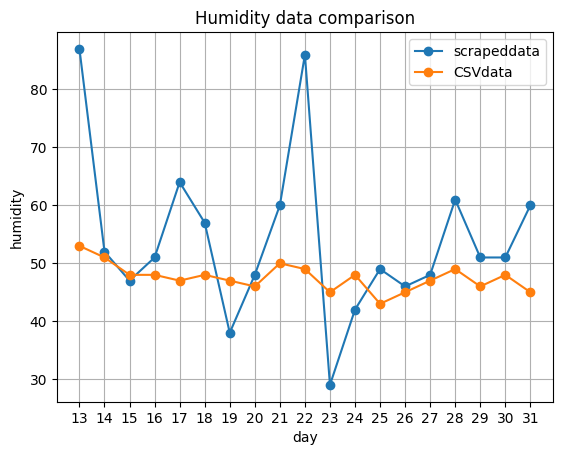

In [104]:
if '日' in scraped_df.columns:
    plt.plot(scraped_df['日'], scraped_df['湿度'], label='scrapeddata', marker='o')


    if '日' in csv_df.columns:
        plt.plot(csv_df['日'], csv_df['湿度'], label='CSVdata', marker='o')

    plt.title('Humidity data comparison')
    plt.xlabel('day')
    plt.ylabel('humidity')
    plt.legend()
    plt.grid(True)
    plt.show()
